# 7. 모델 저장과 콜백

## MNIST 딥러닝 모델 예제

### 라이브러리 import

In [133]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils

### 데이터 로드 및 전처리

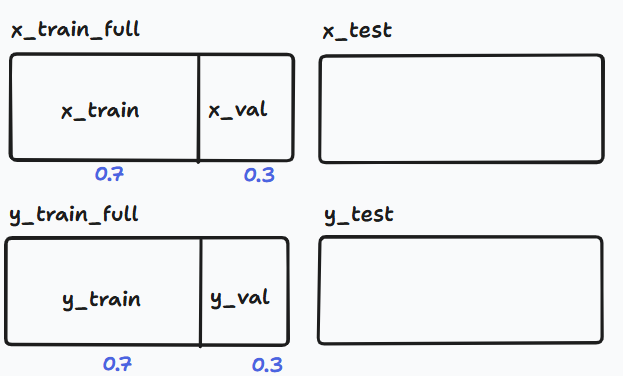

In [134]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape}  레이블: {y_train_full.shape}")
print(f"학습용 데이터: {x_train.shape}  레이블: {y_train.shape}")
print(f"검증용 데이터: {x_val.shape}  레이블: {y_val.shape}")
print(f"테스트용 데이터: {x_test.shape}  레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28)  레이블: (60000,)
학습용 데이터: (42000, 28, 28)  레이블: (42000,)
검증용 데이터: (18000, 28, 28)  레이블: (18000,)
테스트용 데이터: (10000, 28, 28)  레이블: (10000,)


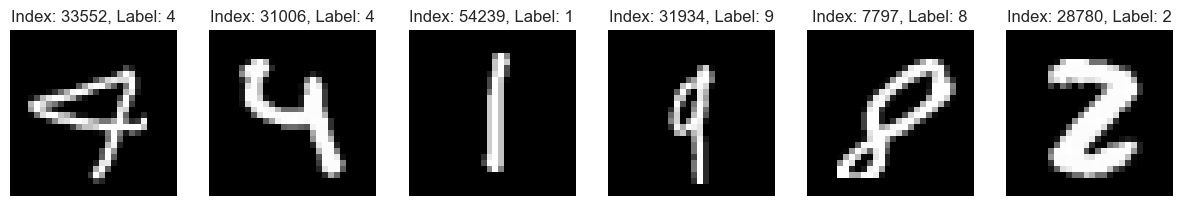

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

num_sample = 6 # 6개만 랜덤으로 x_train_full과 y_train_full에서 추출
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_idxs):
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.axis('off')
  plt.title(f'Index: {idx}, Label: {label}')
  # cmap='gray'로 해주어야 흑백으로 나옴
  plt.imshow(img, cmap='gray')

y_train[0]에는 4 라는 값이 저장되어 있고, x_train[0]에는 숫자 4에 대한 이미지를 0~255 사이의 값으로 표현

In [136]:
print(y_train[0])

4


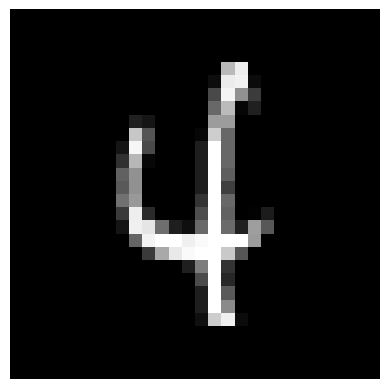

In [137]:
img = x_train[0, :]
plt.axis('off')
plt.imshow(img, cmap='gray')

In [138]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 184 236
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 235 240
   11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  73 244 144
   59   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 186   6
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33  21   0   0   0   0 15

### 데이터 전처리
- 255로 나누어 0과 1사이의 범위로 스케일링
- 원-핫 인코딩 진행

In [139]:
# 0~255 사이의 값으로 이루어져 있으므로 255로 나누면 0과 1사이의 범위로 스케일링
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

# 0~9까지 숫자를 나타내는 레이블이므로 총 10개의 값을 갖는 범주형이다.
# 원-핫 인코딩을 수행하여 정답에는 1, 나머지에는 0을 부여
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

print(y_train[0])
print(y_val[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### 모델 구성

In [140]:
model = models.Sequential()
model.add(keras.Input(shape=(28, 28), name='input'))
model.add(layers.Flatten(input_shape=[28, 28], name='flatten'))
model.add(layers.Dense(100, activation='relu', name='dense1'))
model.add(layers.Dense(64, activation='relu', name='dense2'))
model.add(layers.Dense(32, activation='relu', name='dense3'))
model.add(layers.Dense(10, activation='softmax', name='output'))
model.summary()

C:\Users\juwonhee\Anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1 (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense2 (Dense)                       │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense3 (Dense)                       │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,374 (341.30 KB)

 Trainable params: 87,374 (341.30 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
utils.plot_model(model)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [143]:
utils.plot_model(model, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


### 모델 컴파일 및 학습
- 다중 분류로 클래스가 원-핫 인코딩 되어 있다면 -> categorical_crossentroypy 지정
- 옵티마이저는 가장 기본적인 sgd 지정
- 분류에 대한 성능 확인 지표로 accuracy 지정

In [144]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [145]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2783 - loss: 2.0877 - val_accuracy: 0.7407 - val_loss: 1.0567
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7942 - loss: 0.8411 - val_accuracy: 0.8459 - val_loss: 0.5516
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8623 - loss: 0.5060 - val_accuracy: 0.8787 - val_loss: 0.4228
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8897 - loss: 0.3994 - val_accuracy: 0.8912 - val_loss: 0.3762
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9002 - loss: 0.3542 - val_accuracy: 0.9028 - val_loss: 0.3340
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9115 - loss: 0.3201 - val_accuracy: 0.9056 - val_loss: 0.3189
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9162 - loss: 0.2960 - val_accuracy: 0.9134 - val_loss: 0.2920
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9231 - loss: 0.2720 - val_accuracy: 0.

epochs마다 지표 결과들을 history로 저장

In [146]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### epochs 진행에 따른 변화 추이 시각화

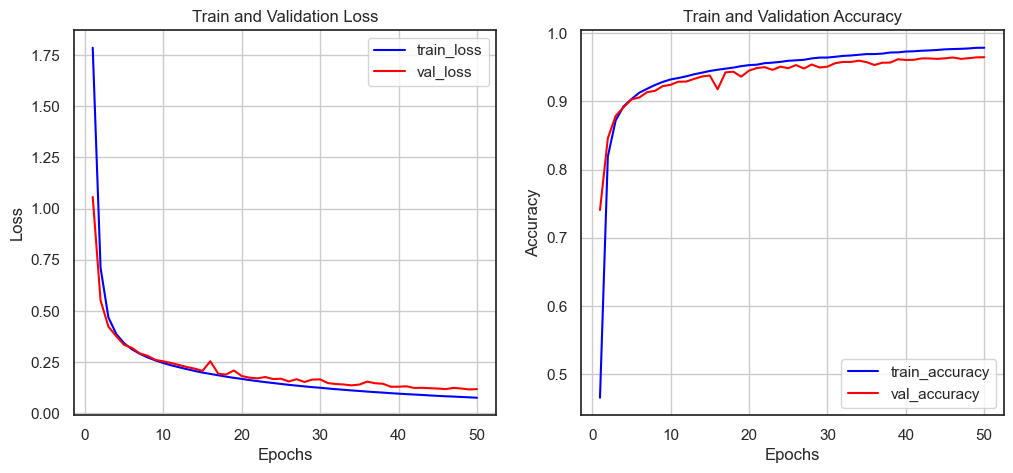

In [147]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [148]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9600 - loss: 0.1315


[0.11050625145435333, 0.9660000205039978]

In [149]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)
print(pred_ys[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)
[9.7457746e-07 9.1539107e-07 3.7758067e-04 1.3468249e-03 1.1312569e-09
 3.0121319e-05 7.8864752e-13 9.9820197e-01 6.2629879e-06 3.5311634e-05]


- 값이 0과 1 사이에 있음
- 합이 1에 근접  
이것으로 softmax 함수가 만들어내는 확률 분포 형태임을 알 수 있다.

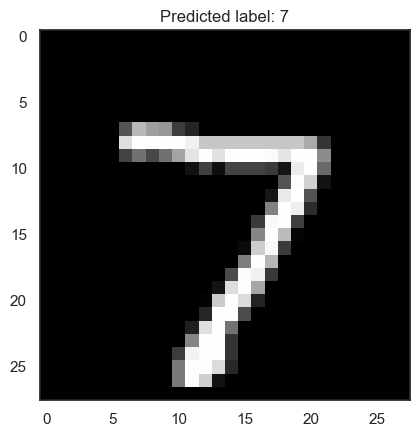

In [150]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.title(f'Predicted label: {arg_pred_y[0]}')
plt.imshow(x_test[0], cmap='gray')
plt.show()

결과값 중에서 가장 큰 수가 있는 위치값을 구하여 예측한 레이블값과 실제 숫자 이미지를 출력해본다.

In [151]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.98      0.97      1032
           3       0.93      0.97      0.95      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.95      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.98      0.94      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### 혼동 행렬 -> 각 레이블 별로 분류가 얼마나 잘 수행되었는가 확인

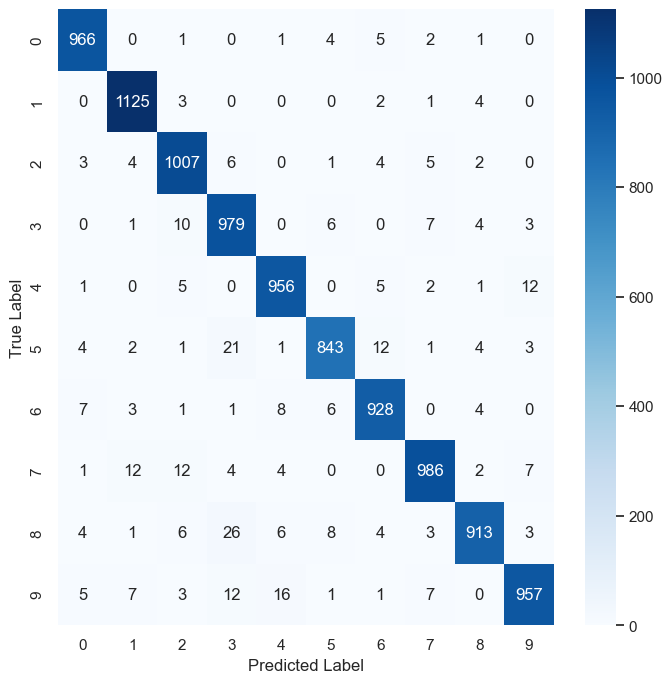

In [152]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 모델 저장과 로드

In [153]:
model.save('mnist_model.h5') # mnist_model.h5 이름으로 모델 저장

In [154]:
loaded_model = models.load_model('mnist_model.h5')
loaded_model.summary()
# mnist_model.h5 이름의 모델을 로드하여 가져옴

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1 (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense2 (Dense)                       │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense3 (Dense)                       │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,376 (341.32 KB)

 Trainable params: 87,374 (341.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [155]:
# 가져온 모델을 이용하여 예측 가능
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)
print(pred_ys2[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(10000, 10)
[9.7457746e-07 9.1539107e-07 3.7758067e-04 1.3468249e-03 1.1312569e-09
 3.0121319e-05 7.8864752e-13 9.9820197e-01 6.2629879e-06 3.5311634e-05]


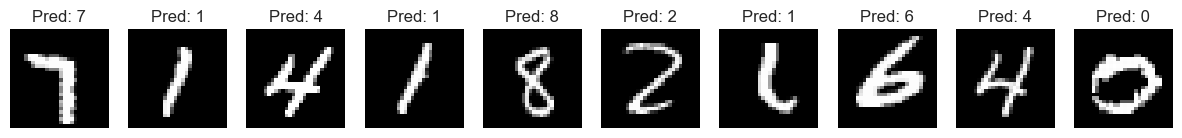

In [156]:
#예측값 시각화하기
arg_pred_y2 = np.argmax(pred_ys2, axis=1)

# 샘플 개수 설정
num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)

plt.figure(figsize=(15, 4))
for i, idx in enumerate(indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(x_test[idx], cmap='gray')  # 이미지일 경우
    plt.title(f"Pred: {arg_pred_y2[idx]}")
    plt.axis('off')
plt.show()

In [157]:
# 위에서 학습시킨 model의 구조를 json 형식으로 model_json에 저장
model_json = model.to_json()

# json으로 저장한 모델을 읽기
loaded_model = keras.models.model_from_json(model_json)

predictions = loaded_model.predict(x_test)
print(predictions.shape)
print(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
(10000, 10)
[0.10825306 0.11444811 0.09458356 0.1009161  0.09248143 0.10260686
 0.09998985 0.09021133 0.09796231 0.09854739]


## callbacks

In [158]:
from tensorflow.keras import callbacks

### ModelCheckpoint
정기적으로 모델의 체크포인트를 저장하고, 문제가 발생할 때 복구하는데 사용

In [159]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[check_point_cb])

Epoch 1/10
1290/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9752 - loss: 0.0827

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9752 - loss: 0.0827
Epoch 2/10
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9780 - loss: 0.0723

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9780 - loss: 0.0723
Epoch 3/10
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9798 - loss: 0.0691

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9798 - loss: 0.0691
Epoch 4/10
1295/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9820 - loss: 0.0631

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9820 - loss: 0.0631
Epoch 5/10
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9835 - loss: 0.0592

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9835 - loss: 0.0593
Epoch 6/10
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9838 - loss: 0.0548

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9838 - loss: 0.0548
Epoch 7/10
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9831 - loss: 0.0543

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9832 - loss: 0.0543
Epoch 8/10
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9872 - loss: 0.0464

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9871 - loss: 0.0464
Epoch 9/10
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9882 - loss: 0.0443

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9882 - loss: 0.0443
Epoch 10/10
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9895 - loss: 0.0409

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9895 - loss: 0.0409


In [160]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/10
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9892 - loss: 0.0381

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9892 - loss: 0.0381 - val_accuracy: 0.9701 - val_loss: 0.1004
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9913 - loss: 0.0345 - val_accuracy: 0.9704 - val_loss: 0.1022
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9911 - loss: 0.0339 - val_accuracy: 0.9676 - val_loss: 0.1092
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9925 - loss: 0.0312 - val_accuracy: 0.9701 - val_loss: 0.1052
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9933 - loss: 0.0294 - val_accuracy: 0.9696 - val_loss: 0.1066
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9940 - loss: 0.0259 - val_accuracy: 0.9688 - val_loss: 0.1089
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9944 - loss: 0.0235 - val_accuracy: 0.9715 - val_loss: 0.1027
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9946 - loss: 0.0237 - val_accurac

최상의 모델만을 저장하는 옵션으로 `save_best_only=True`를 지정

### EarlyStopping
검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용

In [161]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9968 - loss: 0.0172

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9968 - loss: 0.0172 - val_accuracy: 0.9706 - val_loss: 0.1059
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9974 - loss: 0.0154 - val_accuracy: 0.9690 - val_loss: 0.1196
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9979 - loss: 0.0144 - val_accuracy: 0.9713 - val_loss: 0.1088
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9978 - loss: 0.0129 - val_accuracy: 0.9719 - val_loss: 0.1067


### LearningRateScheduler
최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용

In [162]:
# 반환값을 float로 바꿔주기
def scheduler(epoch, learning_rate):
  if epoch < 10:
    return float(learning_rate)
  else:
    return float(learning_rate * tf.math.exp(-0.1))

학습할 때 epoch수에 따라 learning rate를 조절하는 scheduler를 적용 ->  
최종적으로 학습이 끝난 뒤 최종 learning rate 값 확인하는 코드  
=> epoch 수가 10 미만이면 그대로 가지만, 10 이상이 되면 -0.1%씩 감소

In [163]:
# round(model.optimizer.lr.numpy(), 5)

round(model.optimizer.learning_rate.numpy(), 5) # 초기 learning rate = 0.01

0.01

In [164]:
lr_scheduler_cb = callbacks.LearningRateScheduler(scheduler) # callback 정의

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)

round(model.optimizer.learning_rate.numpy(), 5) # 최종 learning rate 확인

0.00607

### Tensorboard
모델의 경과를 모니터링할 때 사용  
logs 폴더를 만들고 학습이 진행되는 동안 로그 파일을 생성

In [165]:
log_dir = './logs'
tensor_board_cb = [callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)]
model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
          epochs=30, callbacks=tensor_board_cb)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9999 - loss: 0.0049 - val_accuracy: 0.9720 - val_loss: 0.1139
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9999 - loss: 0.0044 - val_accuracy: 0.9718 - val_loss: 0.1152
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9999 - loss: 0.0043 - val_accuracy: 0.9719 - val_loss: 0.1146
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9999 - loss: 0.0043 - val_accuracy: 0.9718 - val_loss: 0.1155
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9726 - val_loss: 0.1159
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9716 - val_loss: 0.1174
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9718 - val_loss: 0.1173
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 0.0034 - 

In [166]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 33684), started 5:28:20 ago. (Use '!kill 33684' to kill it.)

### 내용 업데이트

tensorflow 2.X로 넘어오면서 모델 저장은 .keras가 가장 권장되는 방식

`.keras`  	`model.save("model.keras")`	  ✅ 현재 Keras에서 가장 권장되는 포맷

In [167]:
# Checkpoint 콜백
check_point_cb = callbacks.ModelCheckpoint("best_model.h5",
                                           save_best_only=True,
                                           monitor="val_loss",
                                           verbose=1)

# EarlyStopping 콜백
early_stopping_cb = callbacks.EarlyStopping(monitor="val_loss",
                                             patience=3,
                                             restore_best_weights=True,
                                             verbose=1)


history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1298/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019
Epoch 1: val_loss improved from inf to 0.12688, saving model to best_model.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9721 - val_loss: 0.1269
Epoch 2/10
1299/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019
Epoch 2: val_loss did not improve from 0.12688
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9720 - val_loss: 0.1272
Epoch 3/10
1292/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 3: val_loss did not improve from 0.12688
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9719 - val_loss: 0.1272
Epoch 4/10
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0018
Epoch 4: val_loss did not improve from 0.12688
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9719 - val_loss: 0.1275
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


# 8. 모델 학습 기술

## IMDB 딥러닝 모델 예제
IMDB 데이터셋은 영화 사이트 IMDB의 리뷰 데이터를 모아놓은 것으로 텍스트 분류, 감성 분류를 위해 자주 사용하는 데이터이다. 데이터셋은 리뷰 텍스트와 레이블로 구성되어 있고, 레이블은 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한다.

### 데이터 로드 및 전처리

In [168]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [169]:
word_index = imdb.get_word_index() # 단어 출현 빈도 기준으로 내림차순 정렬
# word_index

In [170]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
# index_word

단어 인덱스 딕셔너리를 인덱스 단어 딕셔너리 형태로 변환

In [171]:
# 1 순위의 출현 빈도를 기록한 단어를 출력합니다.
# 키 값의 숫자를 바꿔가며 다른 순위의 단어들도 확인해볼 수 있어요!
index_word[1]

'the'

In [172]:
# 25번째 단어를 key로 추출
word_25th = list(word_index.keys())[24]  # 인덱스는 0부터 시작하므로 24번이 25번째

print(word_25th)
# 해당 단어의 인덱스 값 출력
print(word_index[word_25th])


spider'
52016


In [173]:
review = ' '.join([str(i) for i in train_data[0]])
review

'1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 2 9 35 480 284 5 150 4 172 112 167 2 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 2 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 2 8 4 107 117 5952 15 256 4 2 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 2 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32'

In [174]:
review = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

train_data[0]의 각 인덱스에 매핑되는 단어들로 연결하여 하나의 리뷰를 만들어준다.

#### 텍스트 데이터 -> 딥러닝 모델 학습하기 위한 방법
1. 원핫 인코딩 -> Dense 레이어 사용 -> 선택
2. 고정 길이를 가지도록 패딩 padding 추가하여 임베딩 embedding 레이어 사용

In [175]:
def one_hot_encoding(data, dim=10000): # imdb 데이터의 num_words를 10000으로 설정해서 dim도 10000으로 맞추기
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [176]:
print(train_labels[0])
print(test_labels[0])

1
0


In [177]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train[0])
print(y_test[0])

1.0
0.0


정수형 값을 실수형 값으로 변환

### 모델 구성

In [178]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(16, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

C:\Users\juwonhee\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 모델 컴파일 및 학습

In [179]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', # 긍정/부정
              metrics=['accuracy'])
model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden (Dense)                       │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [180]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 306ms/step - accuracy: 0.7246 - loss: 0.5707 - val_accuracy: 0.8783 - val_loss: 0.3467
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9049 - loss: 0.2876 - val_accuracy: 0.8860 - val_loss: 0.2918
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9240 - loss: 0.2191 - val_accuracy: 0.8885 - val_loss: 0.2796
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9357 - loss: 0.1839 - val_accuracy: 0.8862 - val_loss: 0.2871
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9452 - loss: 0.1566 - val_accuracy: 0.8778 - val_loss: 0.3157
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9527 - loss: 0.1410 - val_accuracy: 0.8799 - val_loss: 0.3110
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9585 - loss: 0.1236 - val_accuracy: 0.8738 - val_loss: 0.3450
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9632 - loss: 0.1107 - val_accuracy: 0.8730 -

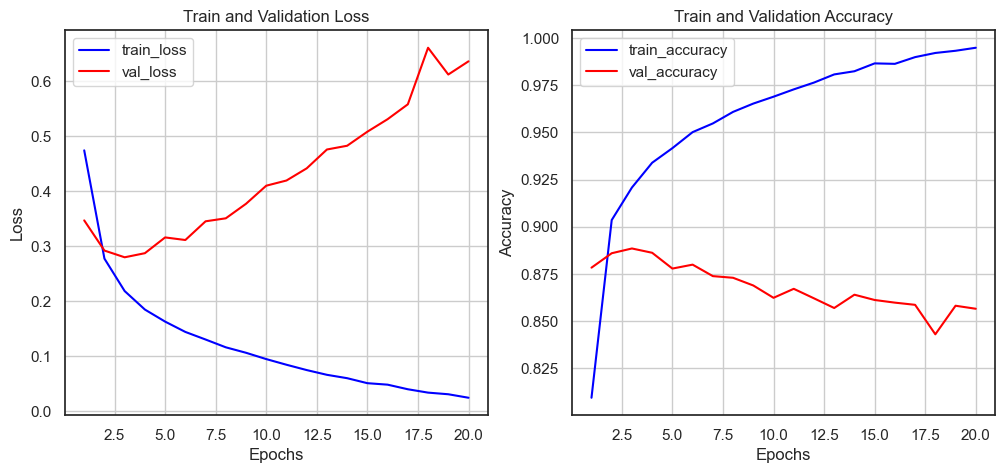

In [181]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

딥러닝 모델의 결과를 살펴보면 val_loss가 점점 증가하는 것을 알 수 있고, val_accuracy는 점점 감소하는 것을 알 수 있다.즉, 과대적합되어 학습용 데이터셋에 대해서만 모델이 적합하게 된 것을 알 수 있다.

# 9. 모델 크기 조절과 규제

이전에 사용했던 IMDB 딥러닝 모델은 과대적합이 발생하는 문제 -> 이 문제를 해결하려면 모델의 크기를 조절  
### 모델 크기 조절 방법  
- 레이어의 유닛수 조절  
  레이어의 유닛수를 증가/감소시켜 모델 전체 파라미터 수를 증가/감소시킬 수 있다.  
- 레이어의 수 조절  
  레이어의 수를 증가시켜 더 깊은 신경망을 만들어 모델의 크기를 증가시킬 수 있다.
  
but 데이터의 규모가 클수록 크고 깊은 모델에서 더 좋은 성능을 보여주지만 데이터에 비해 모델이 너무 크면 과대적합이 발생
=> 데이터의 규모에 따라 모델의 수를 적절하게 조절

### 데이터 로드 및 전처리

In [182]:
from keras.datasets import imdb
import numpy as np

def one_hot_encoding(data, dim=10000): # 아래 imdb.load_data의 num_words를 10000으로 설정할 예정이기 때문에 dim도 10000으로 맞추기
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 모델 구성 및 컴파일

In [183]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 128)                 │       1,280,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden (Dense)                       │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,296,769 (4.95 MB)

 Trainable params: 1,296,769 (4.95 MB)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [184]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 296ms/step - accuracy: 0.6996 - loss: 0.5502 - val_accuracy: 0.8567 - val_loss: 0.3389
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8872 - loss: 0.2787 - val_accuracy: 0.8880 - val_loss: 0.2740
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9220 - loss: 0.2024 - val_accuracy: 0.8567 - val_loss: 0.3483
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9372 - loss: 0.1633 - val_accuracy: 0.8830 - val_loss: 0.2865
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9542 - loss: 0.1273 - val_accuracy: 0.8824 - val_loss: 0.3142
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9686 - loss: 0.0934 - val_accuracy: 0.8453 - val_loss: 0.4179
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9779 - loss: 0.0680 - val_accuracy: 0.8776 - val_loss: 0.3255
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9892 - loss: 0.0409 - val_accuracy: 0.8700 -

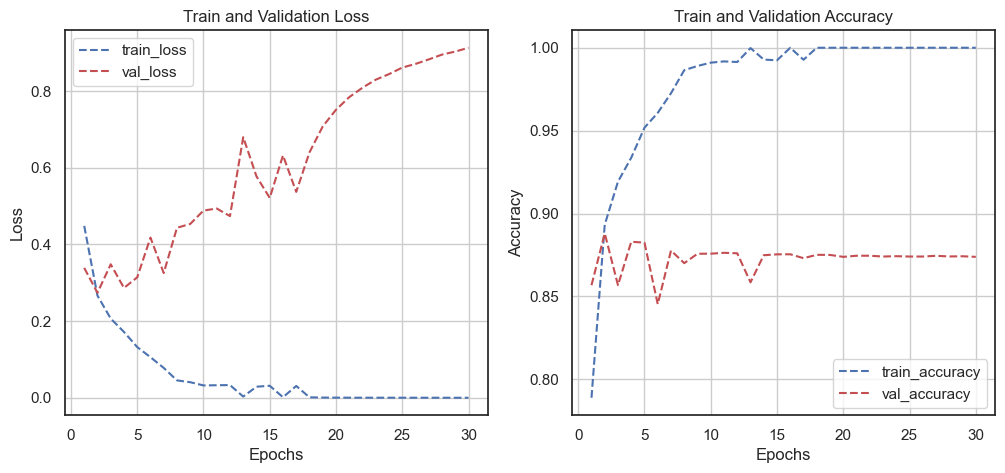

In [185]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

결과를 보면, 딥러닝 모델이 과대적합된 상태인 것을 알 수 있다. 따라서 과대적합을 해결하기 위한 방법을 찾아야 한다.

### 모델 크기 증가
Dense 레이어 유닛수 128 -> 2048 증가

In [186]:
b_model = models.Sequential()
b_model.add(layers.Dense(2048, activation='relu', input_shape=(10000, ), name='input3'))
b_model.add(layers.Dense(2048, activation='relu', name='hidden3'))
b_model.add(layers.Dense(1, activation='sigmoid', name='output3'))
b_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
b_model.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input3 (Dense)                       │ (None, 2048)                │      20,482,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden3 (Dense)                      │ (None, 2048)                │       4,196,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output3 (Dense)                      │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,680,449 (94.15 MB)

 Trainable params: 24,680,449 (94.15 MB)

 Non-trainable params: 0 (0.00 B)

In [187]:
b_model_history = b_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512,
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.6253 - loss: 0.7026 - val_accuracy: 0.6754 - val_loss: 0.7493
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 791ms/step - accuracy: 0.8554 - loss: 0.3447 - val_accuracy: 0.8508 - val_loss: 0.3412
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 700ms/step - accuracy: 0.9161 - loss: 0.2151 - val_accuracy: 0.8825 - val_loss: 0.2821
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 46s 800ms/step - accuracy: 0.9373 - loss: 0.1637 - val_accuracy: 0.8600 - val_loss: 0.3562
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 816ms/step - accuracy: 0.9469 - loss: 0.1352 - val_accuracy: 0.8826 - val_loss: 0.3038
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 44s 899ms/step - accuracy: 0.9751 - loss: 0.0777 - val_accuracy: 0.8816 - val_loss: 0.3262
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 38s 780ms/step - accuracy: 0.9893 - loss: 0.0426 - val_accuracy: 0.8814 - val_loss: 0.3827
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 820ms/step - accuracy: 0.9918 - loss: 0.0336 - val_accurac

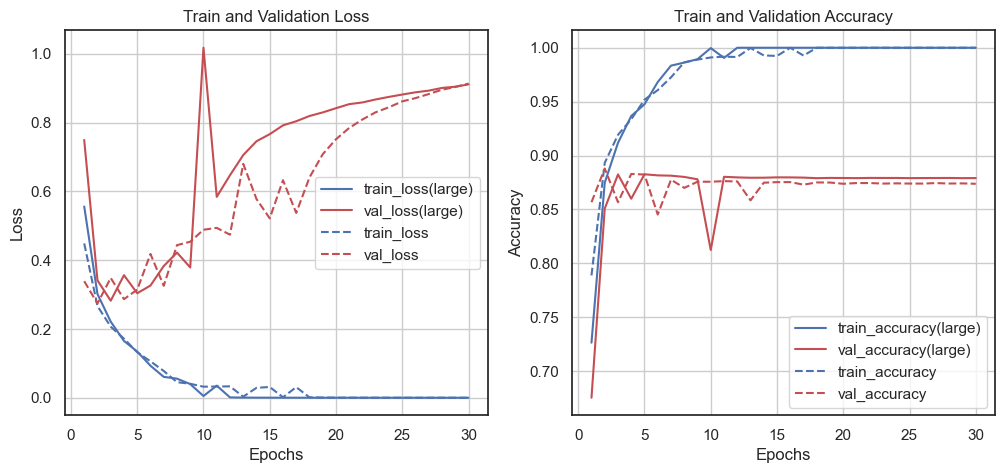

In [188]:
b_history_dict = b_model_history.history

b_loss = b_history_dict['loss']
b_val_loss = b_history_dict['val_loss']
epochs = range(1, len(b_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

b_accuracy = b_history_dict['accuracy']
b_val_accuracy = b_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

결과를 보면, 모델의 크기가 클수록, 즉 파라미터 수가 많은 신경망일수록 빠르게 훈련 데이터 모델링이 가능하고, 학습 손실이 낮아지는 것을 알 수 있다.  
그러나 모델이 과대적합에는 더욱 민감해지는 것을 학습-검증 데이터 손실을 통해 확인이 가능하다.

### 모델 크기 감소
Dense 레이어 유닛수 128 -> 16 감소

In [189]:
s_model = models.Sequential()
s_model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input2'))
s_model.add(layers.Dense(16, activation='relu', name='hidden2'))
s_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
s_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
s_model.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input2 (Dense)                       │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [190]:
s_model_history = s_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512,
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 363ms/step - accuracy: 0.7366 - loss: 0.5551 - val_accuracy: 0.8795 - val_loss: 0.3376
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9043 - loss: 0.2802 - val_accuracy: 0.8854 - val_loss: 0.2908
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9225 - loss: 0.2167 - val_accuracy: 0.8885 - val_loss: 0.2784
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9385 - loss: 0.1791 - val_accuracy: 0.8818 - val_loss: 0.2945
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9461 - loss: 0.1564 - val_accuracy: 0.8785 - val_loss: 0.3098
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9555 - loss: 0.1351 - val_accuracy: 0.8790 - val_loss: 0.3160
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9599 - loss: 0.1235 - val_accuracy: 0.8736 - val_loss: 0.3423
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9632 - loss: 0.1115 - val_accuracy: 0.8612 -

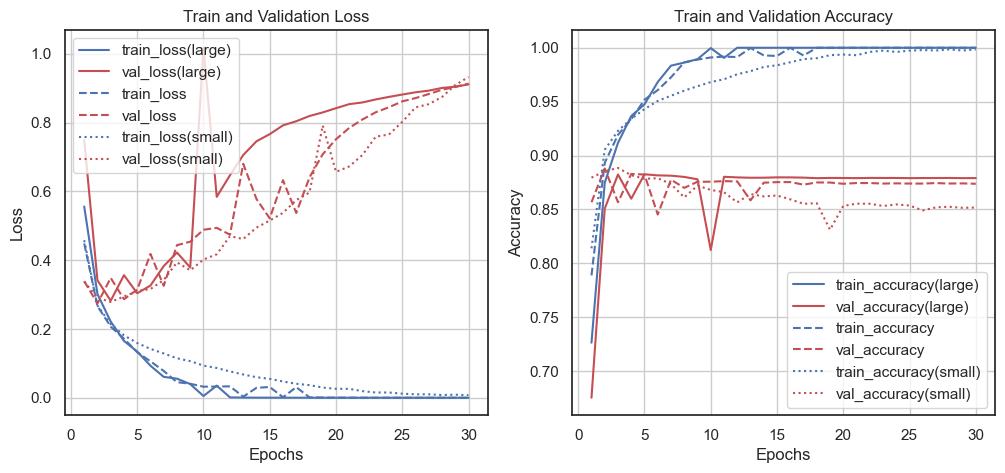

In [191]:
s_history_dict = s_model_history.history

s_loss = s_history_dict['loss']
s_val_loss = s_history_dict['val_loss']
epochs = range(1, len(s_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, s_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, s_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

s_accuracy = s_history_dict['accuracy']
s_val_accuracy = s_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델의 크기를 줄였더니 과대적합 문제에 조금 덜 민감한 것을 알 수 있다.  
즉, 모델의 최적화를 위해서는 파라미터 수를 적절하게 조절 해야 된다는 것을 알 수 있다.

### L1 규제

In [192]:
l1_model =  models.Sequential()
l1_model.add(layers.Dense(16,
                          kernel_regularizer='l1',
                          activation='relu',
                          input_shape=(10000, )))
l1_model.add(layers.Dense(16,
                          kernel_regularizer='l1',
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l1_model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [193]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 336ms/step - accuracy: 0.5610 - loss: 7.1609 - val_accuracy: 0.7398 - val_loss: 1.9371
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6985 - loss: 1.8976 - val_accuracy: 0.7396 - val_loss: 1.7967
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7348 - loss: 1.7752 - val_accuracy: 0.7590 - val_loss: 1.7074
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7596 - loss: 1.6737 - val_accuracy: 0.7730 - val_loss: 1.5977
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7685 - loss: 1.5865 - val_accuracy: 0.7818 - val_loss: 1.5378
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7794 - loss: 1.5145 - val_accuracy: 0.7847 - val_loss: 1.4563
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7989 - loss: 1.4491 - val_accuracy: 0.7960 - val_loss: 1.4270
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8050 - loss: 1.4056 - val_accuracy: 0.8035 -

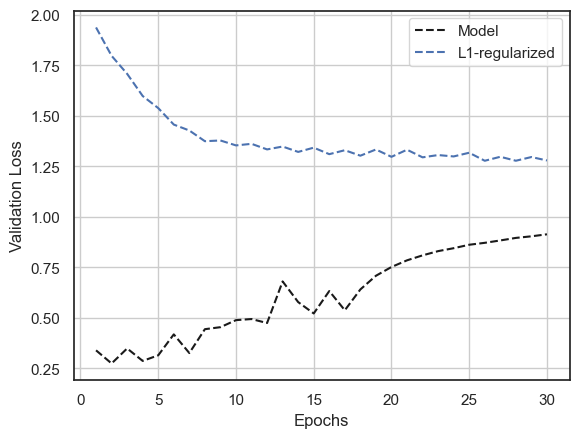

In [194]:
l1_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

### L2 규제

In [195]:
l2_model =  models.Sequential()
l2_model.add(layers.Dense(16,
                          kernel_regularizer='l2',
                          activation='relu',
                          input_shape=(10000, )))
l2_model.add(layers.Dense(16,
                          kernel_regularizer='l2',
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l2_model.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [196]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 313ms/step - accuracy: 0.7299 - loss: 0.8918 - val_accuracy: 0.8647 - val_loss: 0.5907
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8777 - loss: 0.5543 - val_accuracy: 0.8750 - val_loss: 0.5195
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8855 - loss: 0.4968 - val_accuracy: 0.8644 - val_loss: 0.5040
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8953 - loss: 0.4532 - val_accuracy: 0.8617 - val_loss: 0.4916
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8943 - loss: 0.4358 - val_accuracy: 0.8770 - val_loss: 0.4536
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8886 - loss: 0.4285 - val_accuracy: 0.8658 - val_loss: 0.4604
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8917 - loss: 0.4155 - val_accuracy: 0.8749 - val_loss: 0.4413
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9020 - loss: 0.3962 - val_accuracy: 0.8833 -

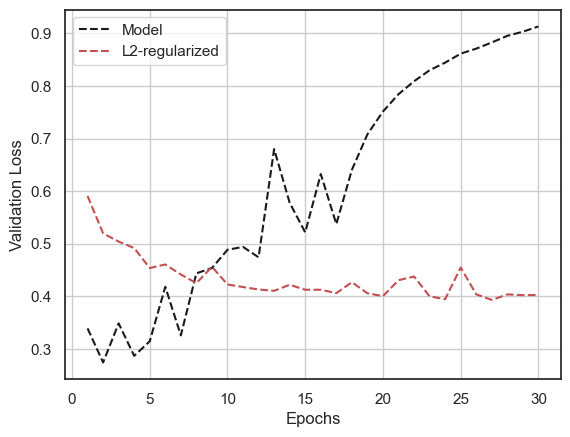

In [197]:
l2_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

### L1 + L2 규제

In [198]:
## 업데이트 되면서 아래처럼 진행해 주어야 한다.


# l1_l2_model = models.Sequential()
# l1_l2_model.add(layers.Dense(16,
#                              kernel_regularizer='l1_l2',
#                              activation='relu', input_shape=(10000, )))
# l1_l2_model.add(layers.Dense(16,
#                              kernel_regularizer='l1_l2',
#                              activation='relu'))
# l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
# l1_l2_model.compile(optimizer='rmsprop',
#                     loss='binary_crossentropy',
#                     metrics=['accuracy'])
# l1_l2_model.summary()


from tensorflow.keras import models, layers, regularizers

l1_l2_model = models.Sequential()
l1_l2_model.add(layers.Dense(16,
                             kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                             activation='relu',
                             input_shape=(10000,)))
l1_l2_model.add(layers.Dense(16,
                             kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                             activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))

l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
l1_l2_model.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [199]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                  epochs=30,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 254ms/step - accuracy: 0.7219 - loss: 1.4061 - val_accuracy: 0.8083 - val_loss: 0.6941
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8469 - loss: 0.6372 - val_accuracy: 0.8495 - val_loss: 0.6175
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8566 - loss: 0.5965 - val_accuracy: 0.8431 - val_loss: 0.6105
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8583 - loss: 0.5803 - val_accuracy: 0.8328 - val_loss: 0.6219
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8689 - loss: 0.5575 - val_accuracy: 0.8597 - val_loss: 0.5663
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8675 - loss: 0.5589 - val_accuracy: 0.8540 - val_loss: 0.5683
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8672 - loss: 0.5465 - val_accuracy: 0.8635 - val_loss: 0.5566
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8725 - loss: 0.5343 - val_accuracy: 0.8705 -

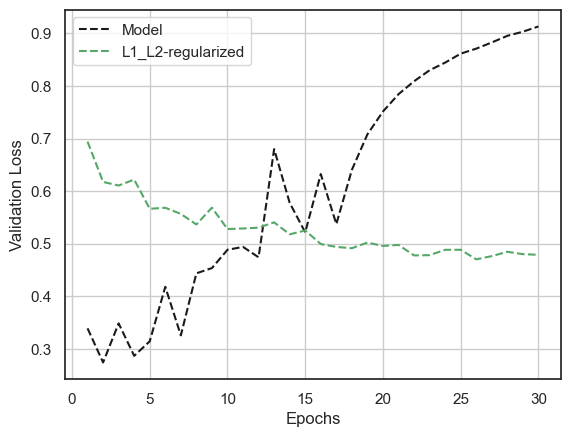

In [200]:
l1_l2_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

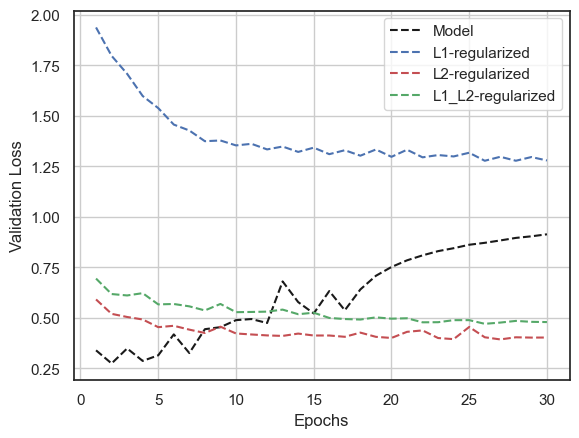

In [201]:
epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

전체 규제 방법들을 비교해보면, L2 규제가 가장 좋은 결과를 보여주고 있다.

### 드롭아웃(20%)

In [202]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [203]:
drop_20_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 314ms/step - accuracy: 0.7024 - loss: 0.5916 - val_accuracy: 0.8701 - val_loss: 0.3816
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8719 - loss: 0.3585 - val_accuracy: 0.8811 - val_loss: 0.3069
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9008 - loss: 0.2722 - val_accuracy: 0.8886 - val_loss: 0.2789
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9237 - loss: 0.2185 - val_accuracy: 0.8850 - val_loss: 0.2854
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9369 - loss: 0.1847 - val_accuracy: 0.8857 - val_loss: 0.2862
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9487 - loss: 0.1557 - val_accuracy: 0.8822 - val_loss: 0.2983
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9540 - loss: 0.1358 - val_accuracy: 0.8778 - val_loss: 0.3340
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9659 - loss: 0.1123 - val_accuracy: 0.8741 -

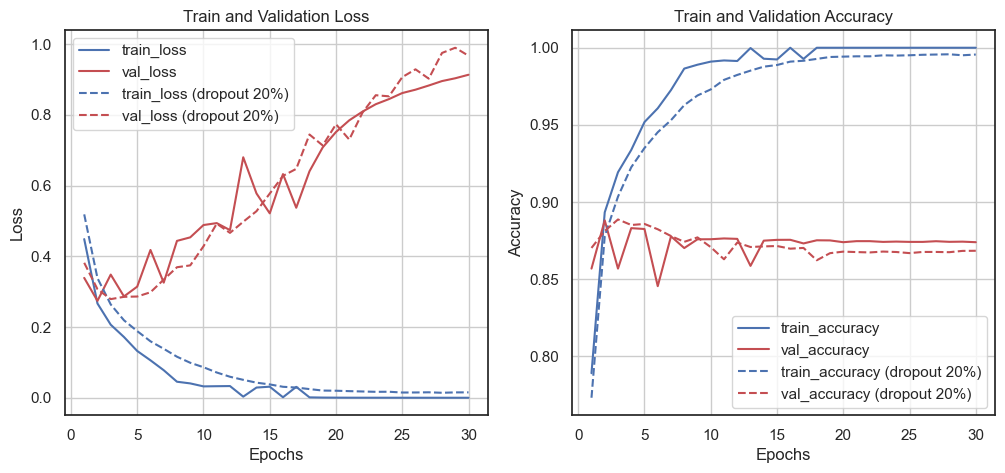

In [204]:
drop_20_dict = drop_20_history.history

drop_20_loss = drop_20_dict['loss']
drop_20_val_loss = drop_20_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_20_accuracy = drop_20_dict['accuracy']
drop_20_val_accuracy = drop_20_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 드룹아웃(50%)

드룹아웃이 포함된 딥러닝 모델을 정의하기 위해 -> 기존 모델에서 사용한 구조를 토대로 적절한 위치에 드롭아웃 레이어를 추가해야 한다.  
첫 번째 레이어와 두 번째 레이어 사이에 dropout 레이어를 추가하는데 20% 정도만 적용하기 위해 0.2로 지정  
두 번째 레이어와 세 번째 레이어 사이에도 같은 방식을 적용한다.

In [205]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [206]:
drop_50_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 426ms/step - accuracy: 0.6074 - loss: 0.6455 - val_accuracy: 0.8649 - val_loss: 0.4464
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8016 - loss: 0.4693 - val_accuracy: 0.8811 - val_loss: 0.3447
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8617 - loss: 0.3702 - val_accuracy: 0.8891 - val_loss: 0.2930
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8949 - loss: 0.3031 - val_accuracy: 0.8897 - val_loss: 0.2774
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9137 - loss: 0.2645 - val_accuracy: 0.8886 - val_loss: 0.2768
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9250 - loss: 0.2268 - val_accuracy: 0.8868 - val_loss: 0.2845
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9307 - loss: 0.2105 - val_accuracy: 0.8875 - val_loss: 0.2976
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9398 - loss: 0.1895 - val_accuracy: 0.8848 -

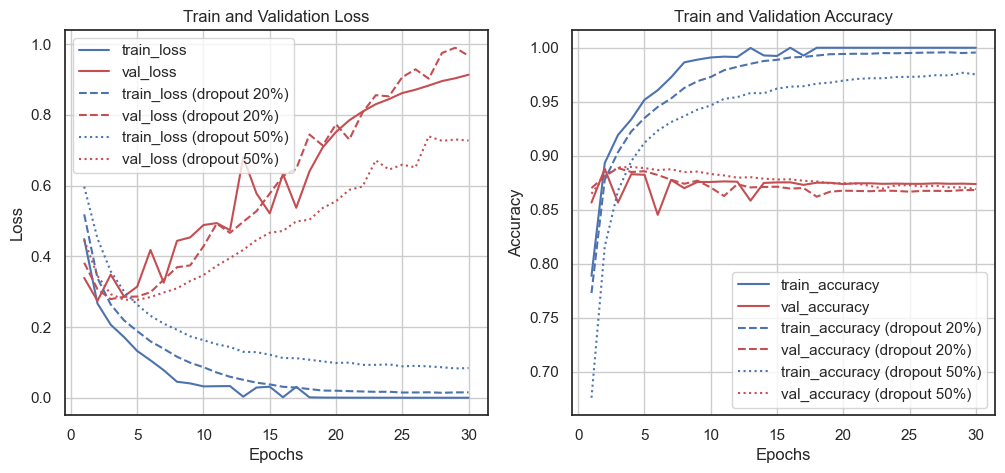

In [207]:
drop_50_dict = drop_50_history.history

drop_50_loss = drop_50_dict['loss']
drop_50_val_loss = drop_50_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.plot(epochs, drop_50_loss, 'b:', label='train_loss (dropout 50%)')
ax1.plot(epochs, drop_50_val_loss, 'r:', label='val_loss (dropout 50%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_50_accuracy = drop_50_dict['accuracy']
drop_50_val_accuracy = drop_50_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.plot(epochs, drop_50_accuracy, 'b:', label='train_accuracy (dropout 50%)')
ax2.plot(epochs, drop_50_val_accuracy, 'r:', label='val_accuracy (dropout 50%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

 드롭아웃을 50% 적용한 모델이 과대적합 정도가 가장 많이 감소하였다.

# 10. 가중치 초기화와 배치 정규화

In [208]:
from tensorflow.keras import models, layers, optimizers

def build_model(activation, initializer):
  model = models.Sequential()
  model.add(layers.Input(shape=(400, 20), name='input'))
  model.add(layers.Dense(20, activation=activation, name='hidden1',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden2',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden3',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden4',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden5',
                        kernel_initializer=initializer))
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizers.SGD(),
                metrics=['accuracy'])
  return model

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import initializers, activations

## 이부분 matplotlib 업데이트 되면서 없어진 부분
sns.set_style('white')
# plt.style.use('seaborn-white')

def show_layer(model):
  input = np.random.randn(400, 20)

  plt.figure(figsize=(12, 6))
  for i in range(1, 6):
    name = 'hidden' + str(i)
    layer = model.get_layer(name)
    input = layer(input)
    plt.subplot(1, 6, i)
    plt.title(name)
    # 이부분을 이렇게 고쳐줘야 표가 나온다 -> numpy로 바꿔주면 계산속도 up
    plt.hist(input.numpy().flatten(), bins=20, range=(-1, 1))
    # plt.hist(input, 20, range=(-1, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
  plt.show()

## 선형 함수 가중치 초기화

### 제로 초기화 initializers.Zeros()

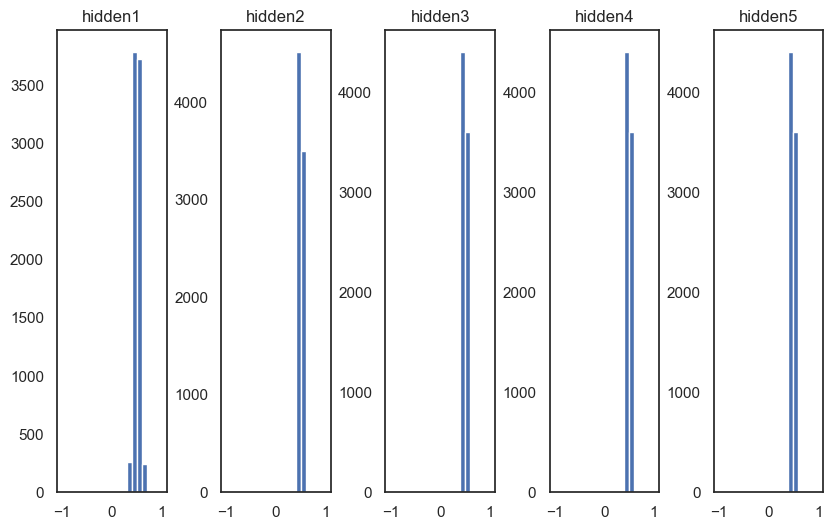

In [210]:
model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)

### 정규분포 초기화 initializers.RandomNormal()

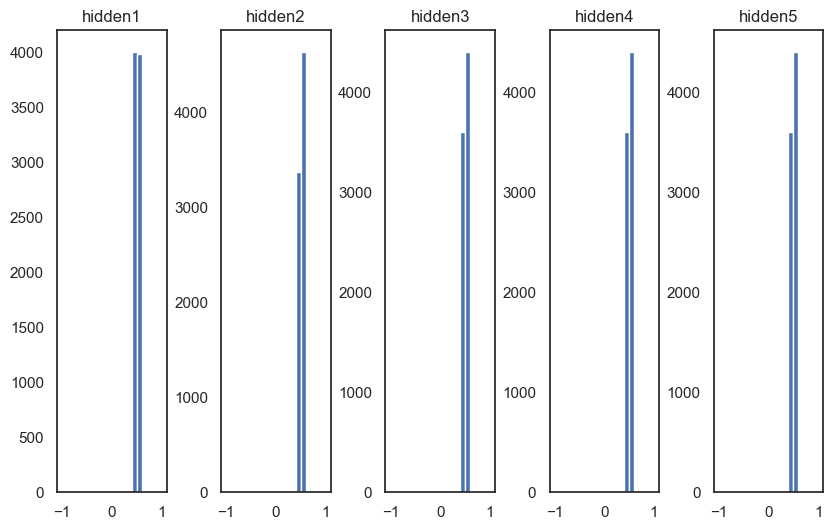

In [211]:
model = build_model(activations.sigmoid, initializers.RandomUniform())
show_layer(model)

### 균일분포 초기화 initializers.RandomUniform()

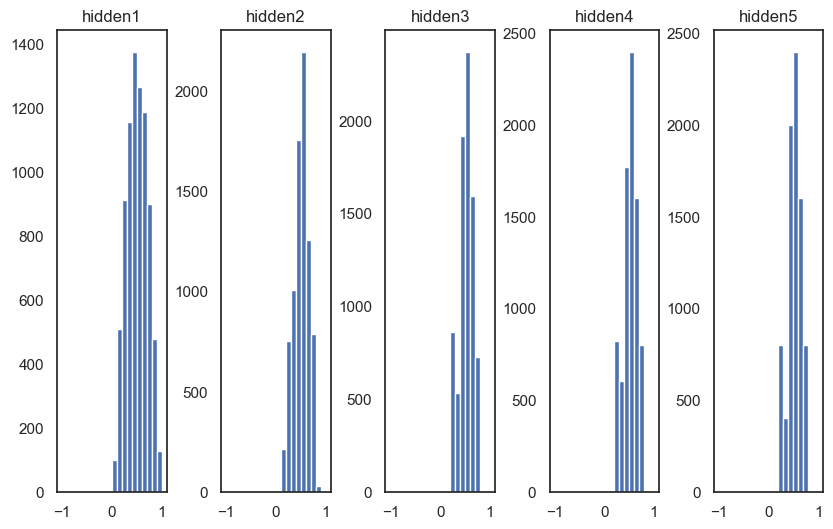

In [212]:
model = build_model(activations.sigmoid, initializers.GlorotNormal())
show_layer(model)

### Xavier(Glorot) 정규분포 초기화 initializers.GlorotNormal()

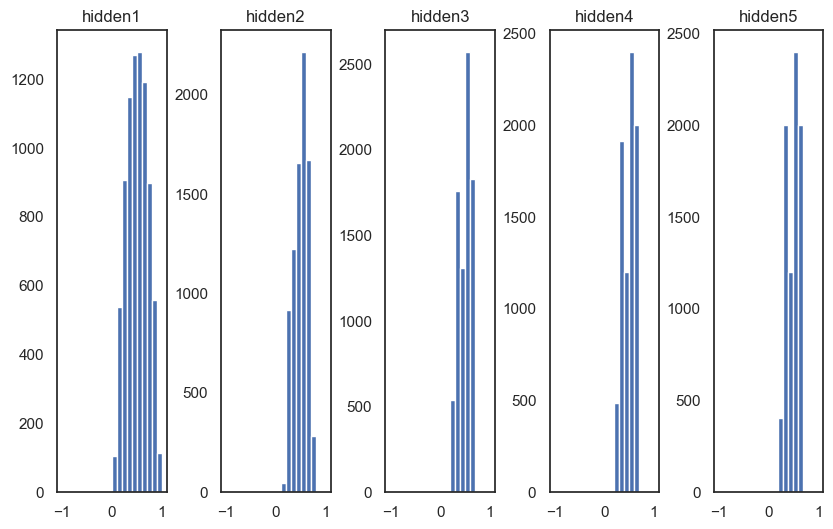

In [213]:
model = build_model(activations.sigmoid, initializers.GlorotUniform())
show_layer(model)

### Xavier(Glorot) 균일분포 초기화 initializers.GlorotUniform()

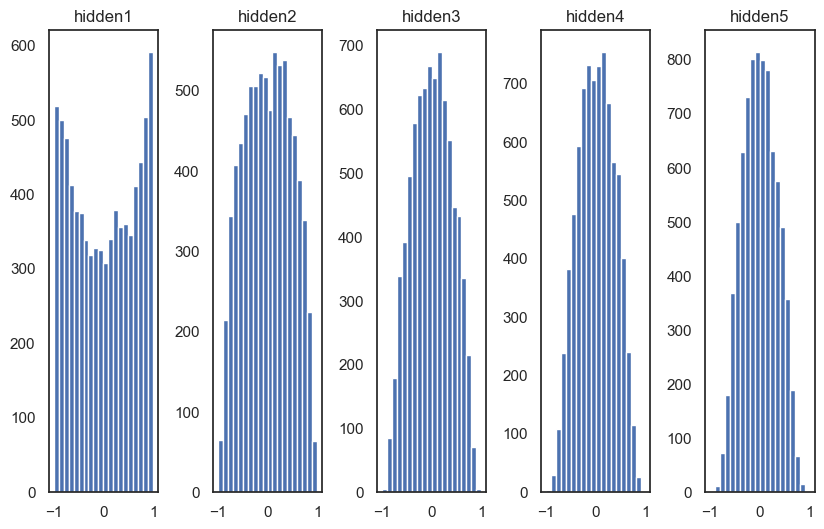

In [214]:
model = build_model(activations.tanh, initializers.GlorotUniform())
show_layer(model)

### He 정규분포 초기화 initializers.HeNormal()

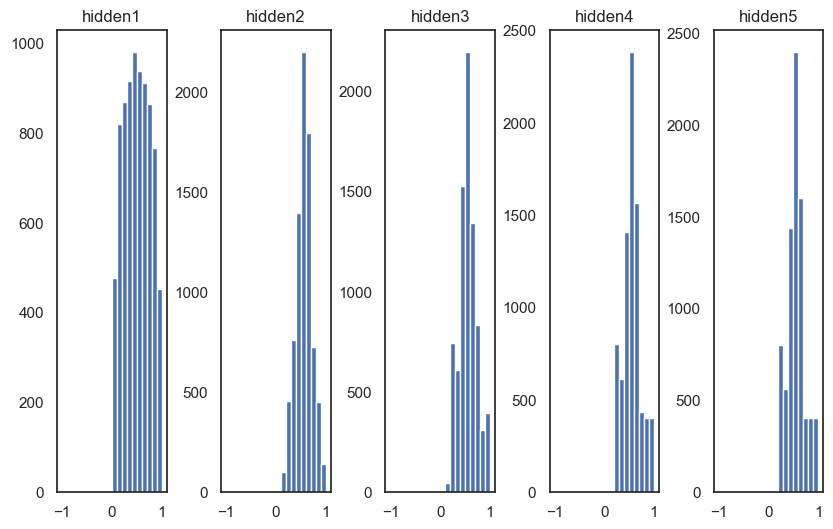

In [215]:
model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)

### He 균일분포 초기화 initializers.HeUniform()

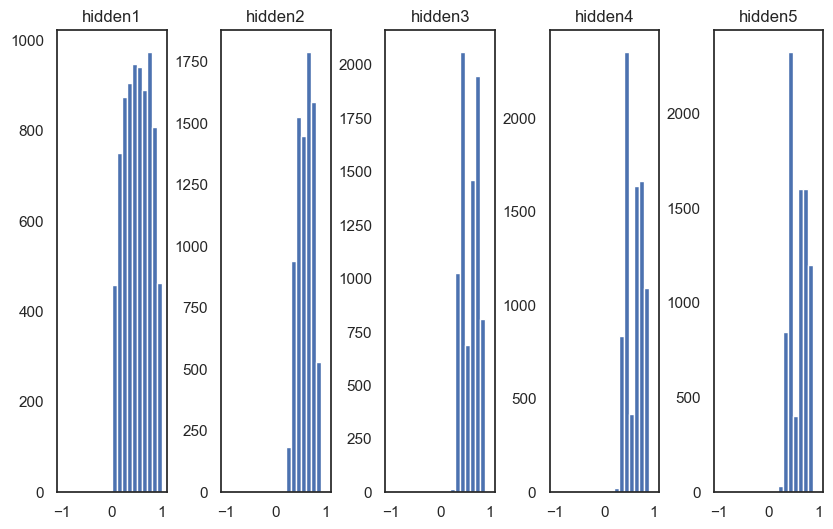

In [216]:
model = build_model(activations.sigmoid, initializers.HeUniform())
show_layer(model)

## 비선형 함수 가중치 초기화

### 제로 초기화 initializers.Zeros()

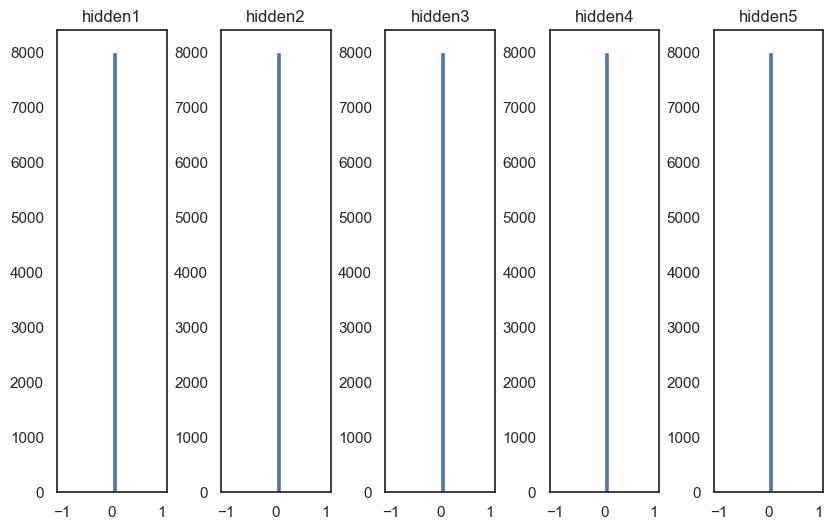

In [217]:
model = build_model(activations.relu, initializers.Zeros())
show_layer(model)

### 정규분포 초기화 initializers.RandomNormal()

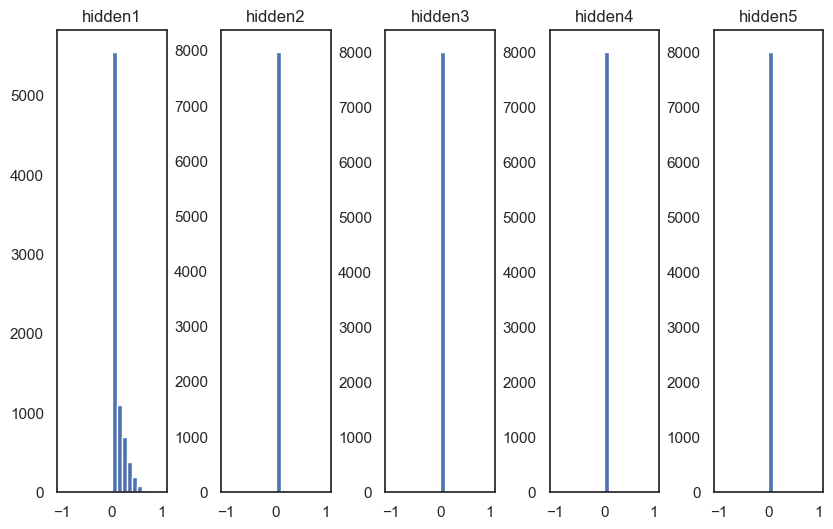

In [218]:
model = build_model(activations.relu, initializers.RandomNormal())
show_layer(model)

### 균일분포 초기화 initializers.RandomUniform()

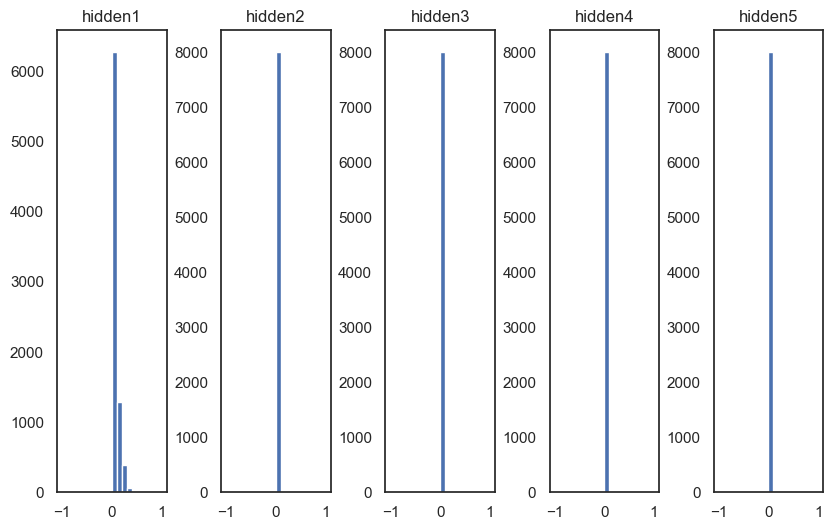

In [219]:
model = build_model(activations.relu, initializers.RandomUniform())
show_layer(model)

### Xavier(Glorot) 정규분포 초기화 initializers.GlorotNormal()

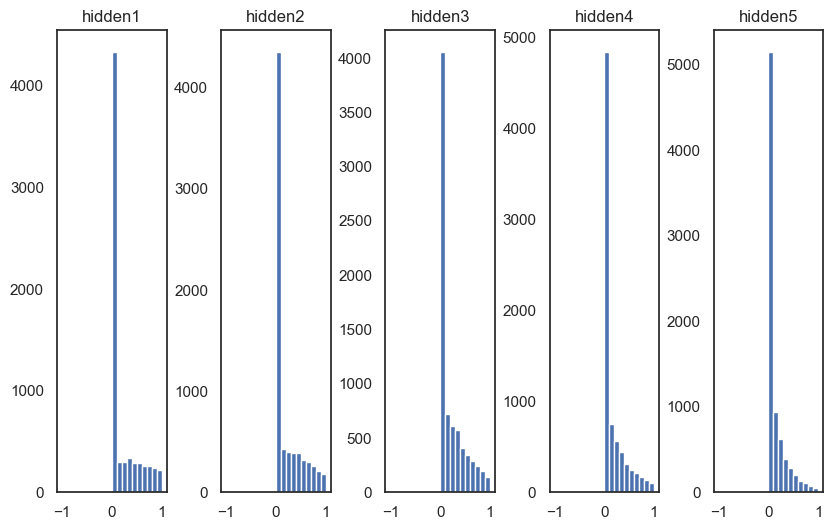

In [220]:
model = build_model(activations.relu, initializers.GlorotNormal())
show_layer(model)

### Xavier(Glorot) 균일분포 초기화 initializers.GlorotUniform()

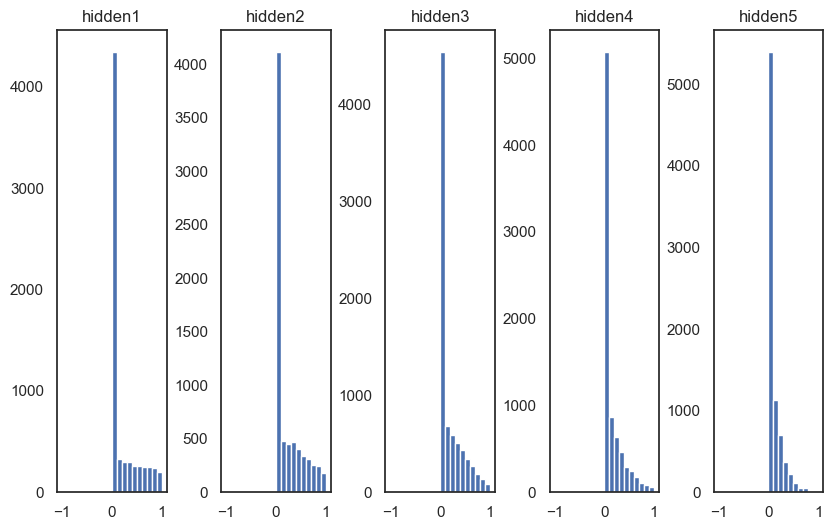

In [221]:
model = build_model(activations.relu, initializers.GlorotUniform())
show_layer(model)

### He 정규분포 초기화 initializers.HeNormal()

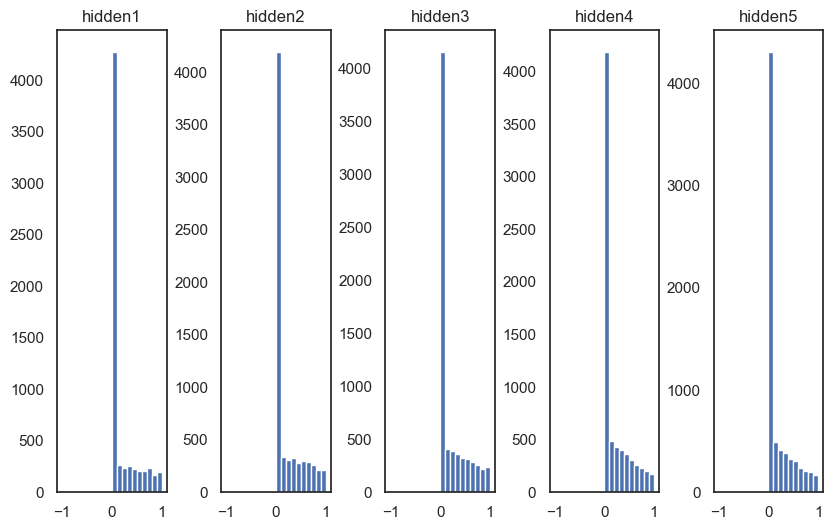

In [222]:
model = build_model(activations.relu, initializers.HeNormal())
show_layer(model)

### He 균일분포 초기화 initializers.HeUniform()

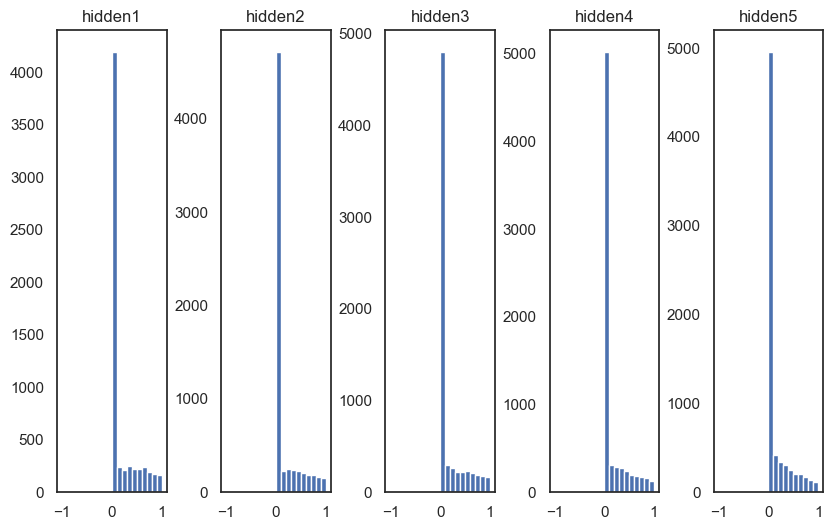

In [223]:
model = build_model(activations.relu, initializers.HeUniform())
show_layer(model)

## Reuters 딥러닝 모델 예제

### 데이터 로드 및 전처리

In [224]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
46


In [225]:
word_index = reuters.get_word_index()
# word_index

In [226]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
# index_word

In [227]:
news = ' '.join([str(i) for i in train_data[0]])
news

'1 2 2 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12'

In [228]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [229]:
print(train_labels[5])
print(train_labels[15])
print(train_labels[25])
print(train_labels[35])
print(train_labels[45])

4
8
1
4
20


In [230]:
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 모델 구성

In [231]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

### 모델 컴파일 및 학습

In [232]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 128)                 │       1,280,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden (Dense)                       │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 46)                  │           5,934 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,302,574 (4.97 MB)

 Trainable params: 1,302,574 (4.97 MB)

 Non-trainable params: 0 (0.00 B)

In [233]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.4146 - loss: 2.8878 - val_accuracy: 0.6589 - val_loss: 1.5305
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7080 - loss: 1.3416 - val_accuracy: 0.7146 - val_loss: 1.2949
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7820 - loss: 1.0089 - val_accuracy: 0.7542 - val_loss: 1.0953
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8349 - loss: 0.7475 - val_accuracy: 0.7796 - val_loss: 0.9778
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8739 - loss: 0.5827 - val_accuracy: 0.7836 - val_loss: 0.9693
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9009 - loss: 0.4817 - val_accuracy: 0.7961 - val_loss: 0.9114
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9170 - loss: 0.3892 - val_accuracy: 0.7983 - val_loss: 0.8851
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9297 - loss: 0.3297 - val_accuracy: 0.8028 - v

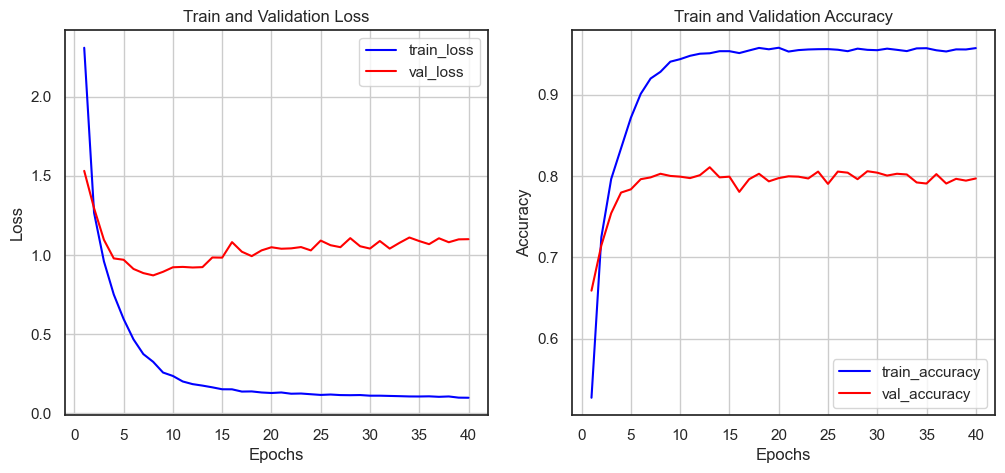

In [234]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 가중치 초기화

In [235]:
def build_model(initializer):
  model = models.Sequential()
  model.add(layers.Dense(128,
                         activation='relu', 
                         kernel_initializer=initializer,
                         input_shape=(10000, ), 
                         name='input'))
  model.add(layers.Dense(128, 
                         activation='relu', 
                         kernel_initializer=initializer,
                         name='hidden'))
  model.add(layers.Dense(46, 
                         activation='softmax', 
                         name='output'))
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))
  return history

In [236]:
def diff_history(history1, history2):
  history1_dict = history1.history
  h1_loss = history1_dict['loss']
  h1_val_loss = history1_dict['val_loss']

  history2_dict = history2.history
  h2_loss = history2_dict['loss']
  h2_val_loss = history2_dict['val_loss']

  epochs = range(1, len(h1_loss) + 1)
  fig = plt.figure(figsize=(12, 5))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
  ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
  ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
  ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
  ax1.set_title('Train and Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  h1_accuracy = history1_dict['accuracy']
  h1_val_accuracy = history1_dict['val_accuracy']

  h2_accuracy = history2_dict['accuracy']
  h2_val_accuracy = history2_dict['val_accuracy']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
  ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
  ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
  ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
  ax2.set_title('Train and Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()

  plt.show()

### 제로 초기화

In [237]:
zero_history = build_model(initializers.Zeros())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.0970 - loss: 3.8175 - val_accuracy: 0.0370 - val_loss: 3.7955
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1079 - loss: 3.7892 - val_accuracy: 0.2110 - val_loss: 3.7725
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.2389 - loss: 3.7664 - val_accuracy: 0.2110 - val_loss: 3.7505
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.2178 - loss: 3.7442 - val_accuracy: 0.2110 - val_loss: 3.7286
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.2287 - loss: 3.7211 - val_accuracy: 0.3620 - val_loss: 3.7070
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3372 - loss: 3.6986 - val_accuracy: 0.3620 - val_loss: 3.6856
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.3516 - loss: 3.6784 - val_accuracy: 0.3620 - val_loss: 3.6642
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3540 - loss: 3.6555 - val_accuracy: 0.2110 - v

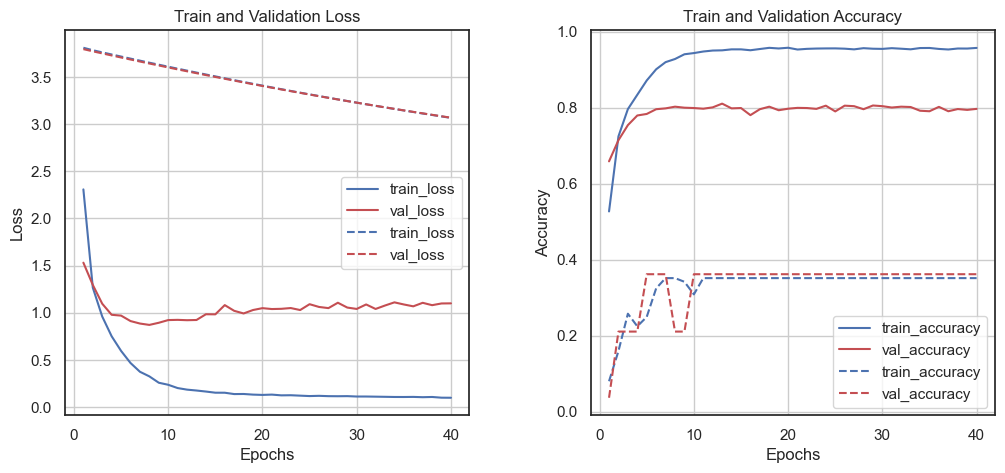

In [238]:
diff_history(history, zero_history)

### 정규분포 초기화

In [239]:
normal_history = build_model(initializers.RandomNormal())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.3894 - loss: 2.9107 - val_accuracy: 0.6006 - val_loss: 1.6685
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6476 - loss: 1.5150 - val_accuracy: 0.6790 - val_loss: 1.3783
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7317 - loss: 1.1770 - val_accuracy: 0.7061 - val_loss: 1.2430
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7651 - loss: 1.0186 - val_accuracy: 0.7391 - val_loss: 1.1369
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8090 - loss: 0.8407 - val_accuracy: 0.7618 - val_loss: 1.0622
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8460 - loss: 0.6756 - val_accuracy: 0.7618 - val_loss: 1.0183
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8687 - loss: 0.5563 - val_accuracy: 0.7707 - val_loss: 0.9740
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.8960 - loss: 0.4563 - val_accuracy: 0.7769 - 

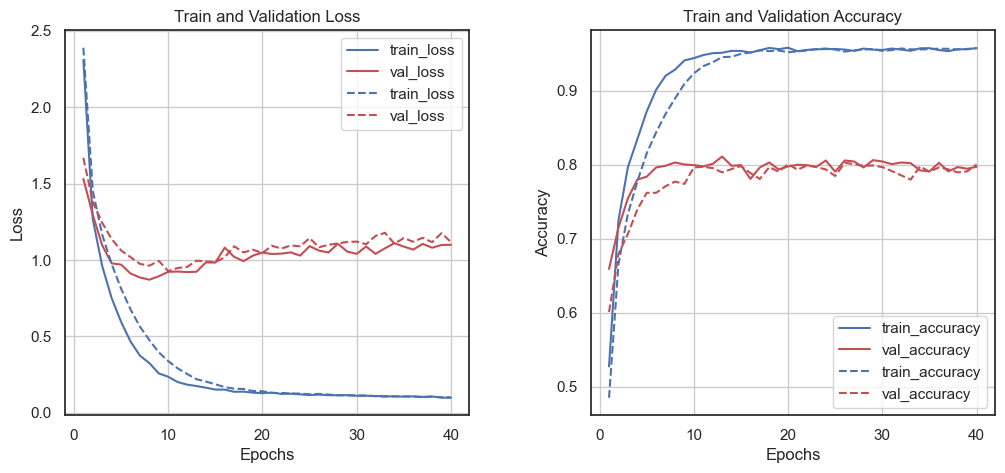

In [240]:
diff_history(history, normal_history)

### Xavier(Glorot) 초기화

In [241]:
glorot_history = build_model(initializers.GlorotNormal())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.3870 - loss: 2.8712 - val_accuracy: 0.6612 - val_loss: 1.5101
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6987 - loss: 1.3532 - val_accuracy: 0.7231 - val_loss: 1.2299
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7853 - loss: 0.9727 - val_accuracy: 0.7449 - val_loss: 1.0916
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8346 - loss: 0.7458 - val_accuracy: 0.7734 - val_loss: 0.9789
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8829 - loss: 0.5429 - val_accuracy: 0.7818 - val_loss: 0.9483
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9027 - loss: 0.4568 - val_accuracy: 0.7965 - val_loss: 0.8988
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9253 - loss: 0.3430 - val_accuracy: 0.7961 - val_loss: 0.8958
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9373 - loss: 0.2994 - val_accuracy: 0.7974 - v

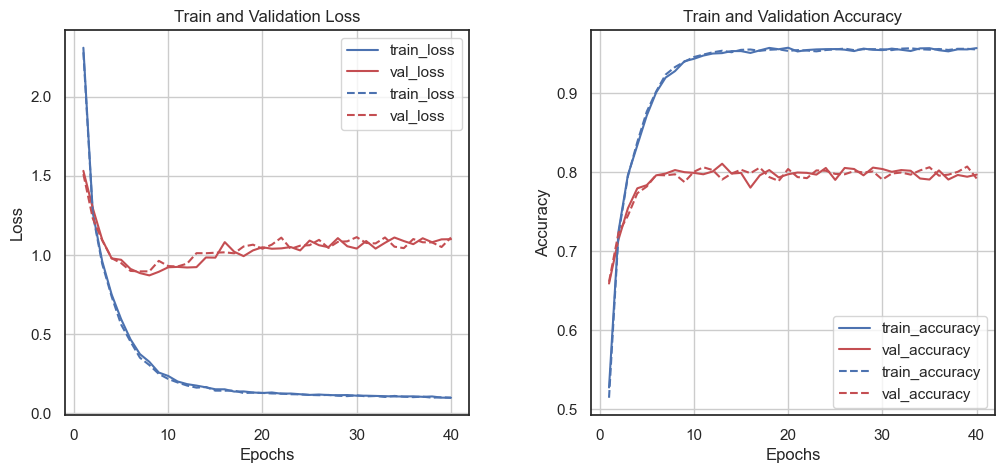

In [242]:
diff_history(history, glorot_history)

### He 초기화

In [243]:
he_history = build_model(initializers.HeNormal())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.4627 - loss: 2.7440 - val_accuracy: 0.6817 - val_loss: 1.4017
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7485 - loss: 1.1423 - val_accuracy: 0.7404 - val_loss: 1.1431
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8260 - loss: 0.8073 - val_accuracy: 0.7689 - val_loss: 1.0144
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8768 - loss: 0.5759 - val_accuracy: 0.7805 - val_loss: 0.9472
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9099 - loss: 0.4465 - val_accuracy: 0.7943 - val_loss: 0.9010
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9274 - loss: 0.3298 - val_accuracy: 0.7841 - val_loss: 0.9416
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9299 - loss: 0.2985 - val_accuracy: 0.8014 - val_loss: 0.8902
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9497 - loss: 0.2166 - val_accuracy: 0.7863 - v

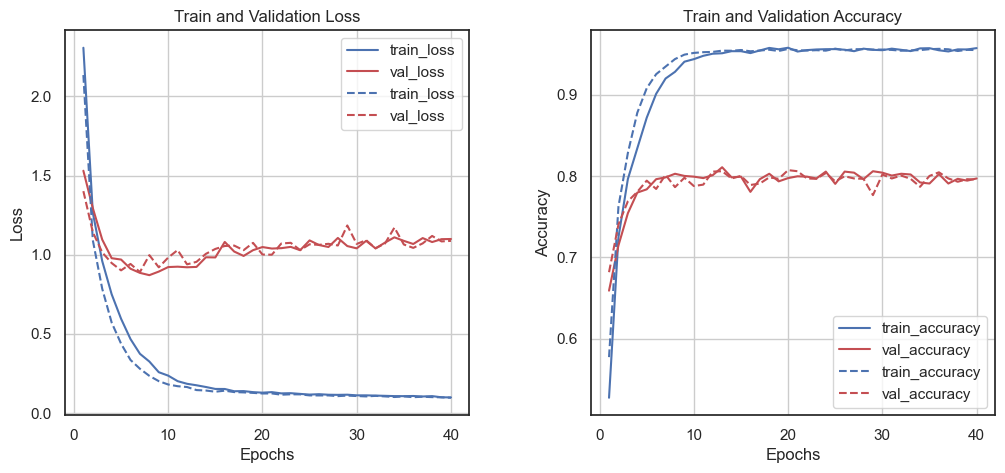

In [244]:
diff_history(history, he_history)

## 배치 정규화

### 모델 구성 및 컴파일

In [245]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (Dense)                        │ (None, 128)                 │       1,280,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden (Dense)                       │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 46)                  │           5,934 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,303,598 (4.97 MB)

 Trainable params: 1,303,086 (4.97 MB)

 Non-trainable params: 512 (2.00 KB)

In [246]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.5195 - loss: 2.2920 - val_accuracy: 0.7471 - val_loss: 3.3258
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8789 - loss: 0.6553 - val_accuracy: 0.7560 - val_loss: 3.0732
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9349 - loss: 0.3549 - val_accuracy: 0.7088 - val_loss: 2.7774
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9533 - loss: 0.2293 - val_accuracy: 0.7119 - val_loss: 2.4145
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9598 - loss: 0.1676 - val_accuracy: 0.6309 - val_loss: 2.1203
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9602 - loss: 0.1366 - val_accuracy: 0.7186 - val_loss: 1.7903
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9579 - loss: 0.1315 - val_accuracy: 0.6821 - val_loss: 1.6112
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9583 - loss: 0.1160 - val_accuracy: 0.7373 - v

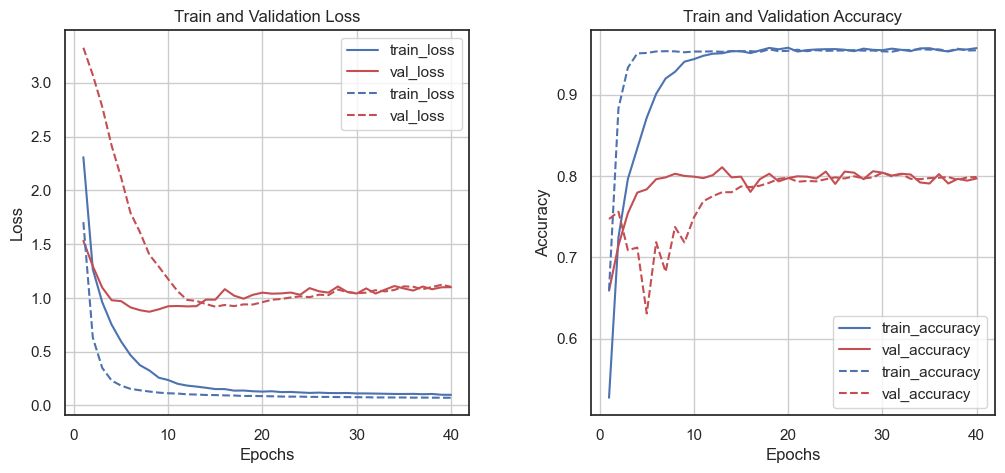

In [247]:
diff_history(history, batch_norm_history)

기본 모델과 배치 정규화를 적용한 모델을 비교해보면, 배치 정규화를 적용한 모델이 좀 더 빠르고 안정되게 학습이 되는 것을 알 수 있다.